In [1]:
import pandas as pd

In [2]:
cov_data = pd.read_csv('./worldwide_covid_data.csv')

In [3]:
vax_rate = pd.read_csv('./COVID-19_vaccination_rates.csv')

In [4]:
vax_rate = vax_rate[['location', 'people_fully_vaccinated_per_hundred']].groupby(['location']).max()
vax_rate

,people_fully_vaccinated_per_hundred
location,
Afghanistan,8.95
Africa,7.72
Albania,34.15
Algeria,12.08
Andorra,64.04
...,...
Wallis and Futuna,53.39
World,45.05
Yemen,1.20


In [5]:
cov_deaths = cov_data.rename(columns={'Country':'location'})[['location','Deaths/1M population']].set_index('location')
cov_deaths

,Deaths/1M population
location,
Afghanistan,182
Albania,1034
Algeria,133
Andorra,1679
Angola,50
...,...
Venezuela,176
Vietnam,230
Yemen,62


In [6]:
df = pd.merge(vax_rate, cov_deaths, left_index=True, right_index=True).rename(columns={'Deaths/1M population': 'deaths_per_million'})
df

,people_fully_vaccinated_per_hundred,deaths_per_million
location,,
Afghanistan,8.95,182
Albania,34.15,1034
Algeria,12.08,133
Andorra,64.04,1679
Angola,9.67,50
...,...,...
Venezuela,34.34,176
Vietnam,56.54,230
Yemen,1.20,62


In [7]:
import matplotlib.pyplot as plt

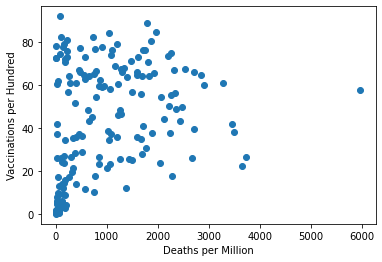

In [8]:
plt.scatter(df['deaths_per_million'], df['people_fully_vaccinated_per_hundred'])
plt.xlabel('Deaths per Million')
plt.ylabel('Vaccinations per Hundred')
plt.show()

# Idea: Limit countries to ones that have unlimited access to vaccines

In [9]:
# get gdp
df0 = pd.read_csv('gdp_per_capita.csv') 
df0 = df0[["Country Name","2020"]] # select countries and reduce to gdp
df0.rename(columns={'2020': 'gdp_per_capita_2020'}, inplace=True)
df0 = df0.loc[(df0["gdp_per_capita_2020"]==df0["gdp_per_capita_2020"])]
df0 = df0.set_index('Country Name')
df0

,gdp_per_capita_2020
Country Name,
Africa Eastern and Southern,3677.111255
Afghanistan,2077.874554
Africa Western and Central,4240.534782
Angola,6443.032680
Albania,13899.933981
...,...
Samoa,6766.228447
Kosovo,11383.404733
South Africa,13355.598709


In [10]:
df_fin = pd.merge(df, df0, left_index=True, right_index=True)

In [11]:
df_fin = df_fin[df_fin['gdp_per_capita_2020'] > 50000]

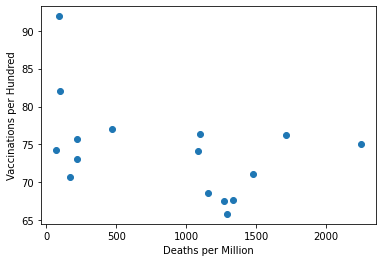

In [12]:
plt.scatter(df_fin['deaths_per_million'], df_fin['people_fully_vaccinated_per_hundred'])
plt.xlabel('Deaths per Million')
plt.ylabel('Vaccinations per Hundred')
plt.show()

In [13]:
df_fin

,people_fully_vaccinated_per_hundred,deaths_per_million,gdp_per_capita_2020
Australia,74.26,71,52397.387048
Austria,67.50,1273,55648.874565
Belgium,75.03,2247,52626.581638
Bermuda,76.28,1711,80799.516940
Denmark,77.04,471,60551.640172
Finland,73.13,218,50810.527408
Germany,68.56,1157,54263.649615
Iceland,82.08,99,55224.684802
Ireland,76.37,1096,95237.241299
Luxembourg,67.69,1332,118503.551005
